##**The Sparks Foundation-GRIP-Data Science & Business Analytics**
###**Task 2 - Prediction using unsupervised ML**
###**Name - Dhawal Vijayvargiya**



**Problem Stetement :** Predict the optimum number of clusters for the iris data set. & represent it visually.

Iris data set consist of 3 types of flower namely Iris-setosa,Iris-versicolour & Iris-virginica.

**Steps to Achieve the Goal :**
*   Step 1 - Importing the dataset
*   Step 2 - Visualising the data
*   Step 3 - Finding the optimum number of clusters
*   Step 4 - Applying k means clustering on the data
*   Step 5 - Visualising the clusters

####**Step 1 - Importing the dataset**

In this step we will import the required libraries & data set.

In [1]:
# Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans

In [2]:
# Load the iris dataset
data = pd.read_csv('Iris.csv')
data.drop('Id',axis=1,inplace=True)
data.head() # See the first 5 rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


####**Step 2-Visualization the data**
In this step we will try to visualize our dataset

In [3]:
data.tail() # See the last 5 rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
data.shape

(150, 5)

In [5]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


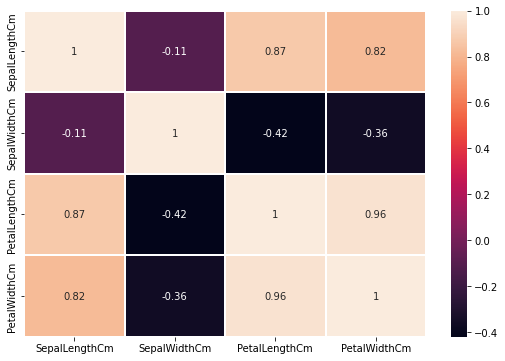

In [9]:
fig=plt.figure(figsize=(9,6))
sns.heatmap(data.corr(),linewidths=1,annot=True)

####**Step 3 - Findind the optimum number of cluster**
Before clustering the data using kmeans, we need to specify the number of ciusters. In order to find the optimum number of clusters,there are various methods available like Sihouette Coefficient & the Elbow method.We will use Elbow method.

In Elbow method,the number of clusters varies within a certain range.For each number,within-cluster sum of square(wss) value is calculated & stored in a list.These value are then plotted against the range of clusters used before.The location of bend in the 2d plot indicates the appropiate number of clusters.

In [10]:
# Calculating the within-cluster sum of square
x = data.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

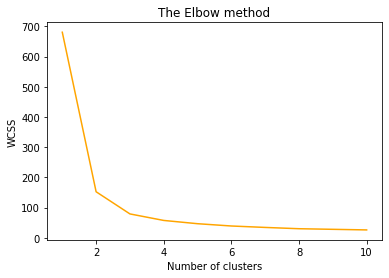

In [11]:
# Ploting the "within-cluster sum of square" against clusters range

plt.plot(range(1, 11), wcss, color="orange")
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

From the above graph, we can clearly see why it is called 'The elbow method' the optimum cluster is where the elbow occurs.This is when the within cluster sum of squares(WCSS)doesn't decrease significantly with every iteration.

####**Step 4 - Applying k means clustering on the data**

In [12]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
predictions = kmeans.fit_predict(x)

####**Step 5 - Visualiing the clusters**

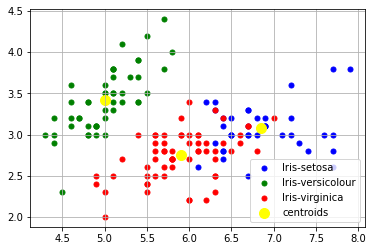

In [13]:

# Visualising the clusters
x = data.iloc[:,[0,1,2,3]].values
plt.scatter(x[predictions == 0,0],x[predictions == 0,1], s=25, c='blue', label = 'Iris-setosa')
plt.scatter(x[predictions == 1,0],x[predictions == 1,1], s=25, c='green', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2,0],x[predictions == 2,1], s=25, c='red', label = 'Iris-virginica')

# Plotting the cluster centers

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s=100, c='yellow',label ='centroids')
plt.legend()
plt.grid()
plt.show()

####**THANK YOU!**